In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

### READ DATA ###

In [ ]:
url = 'https://raw.githubusercontent.com/itsmecevi/dataset/main/creditdata.csv'

# Membaca dataset dari URL
df = pd.read_csv(url)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


### EXPLORATORY DATA ANALYSIS ###

In [ ]:
df.columns
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [ ]:
# Menentukan kolom numerik
numerical_features = [
    'ID', 'LIMIT_BAL', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Memisahkan kolom numerik dari dataset
df_numerik = df[numerical_features]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
# Jumlah unique values untuk kolom numerik
num_unique_numerical = df_numerik.nunique()
print("Jumlah unique values untuk kolom numerik:")
print(num_unique_numerical)

Jumlah unique values untuk kolom numerik:
ID           21000
LIMIT_BAL       78
AGE             55
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           10
PAY_5           10
PAY_6           10
BILL_AMT1    16700
BILL_AMT2    16332
BILL_AMT3    16142
BILL_AMT4    15785
BILL_AMT5    15400
BILL_AMT6    15102
PAY_AMT1      6336
PAY_AMT2      6304
PAY_AMT3      5964
PAY_AMT4      5547
PAY_AMT5      5486
PAY_AMT6      5519
dtype: int64


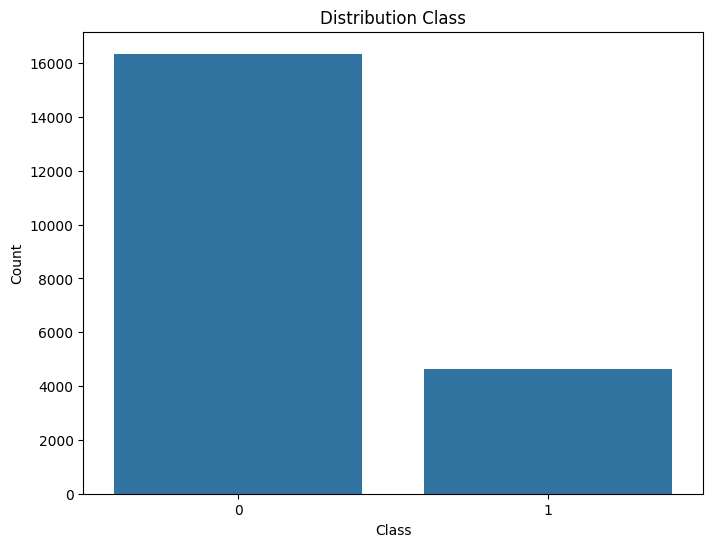

Distribution Class:
default_payment_next_month
0    16355
1     4645
Name: count, dtype: int64


In [ ]:
# Menghitung jumlah sampel dalam setiap kelas
class_counts = df['default_payment_next_month'].value_counts()

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default_payment_next_month')
plt.title('Distribution Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Menampilkan jumlah sampel dalam setiap kelas
print("Distribution Class:")
print(class_counts)

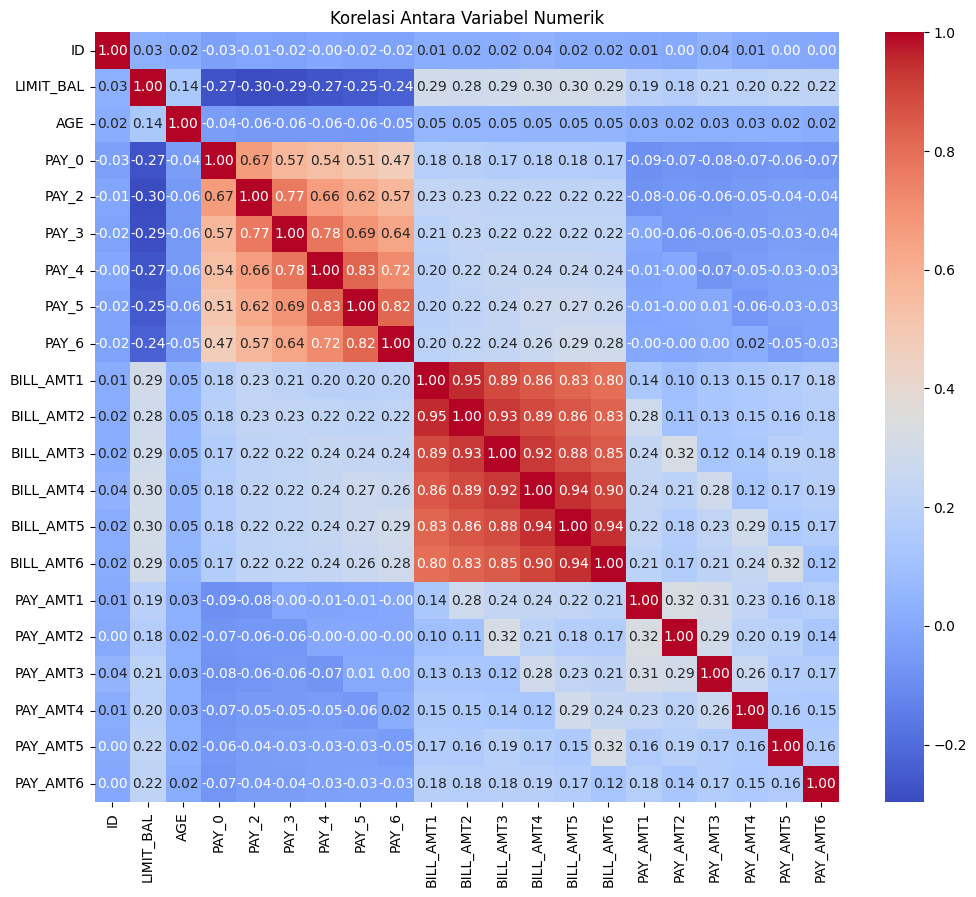

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numerik.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Variabel Numerik')
plt.show()

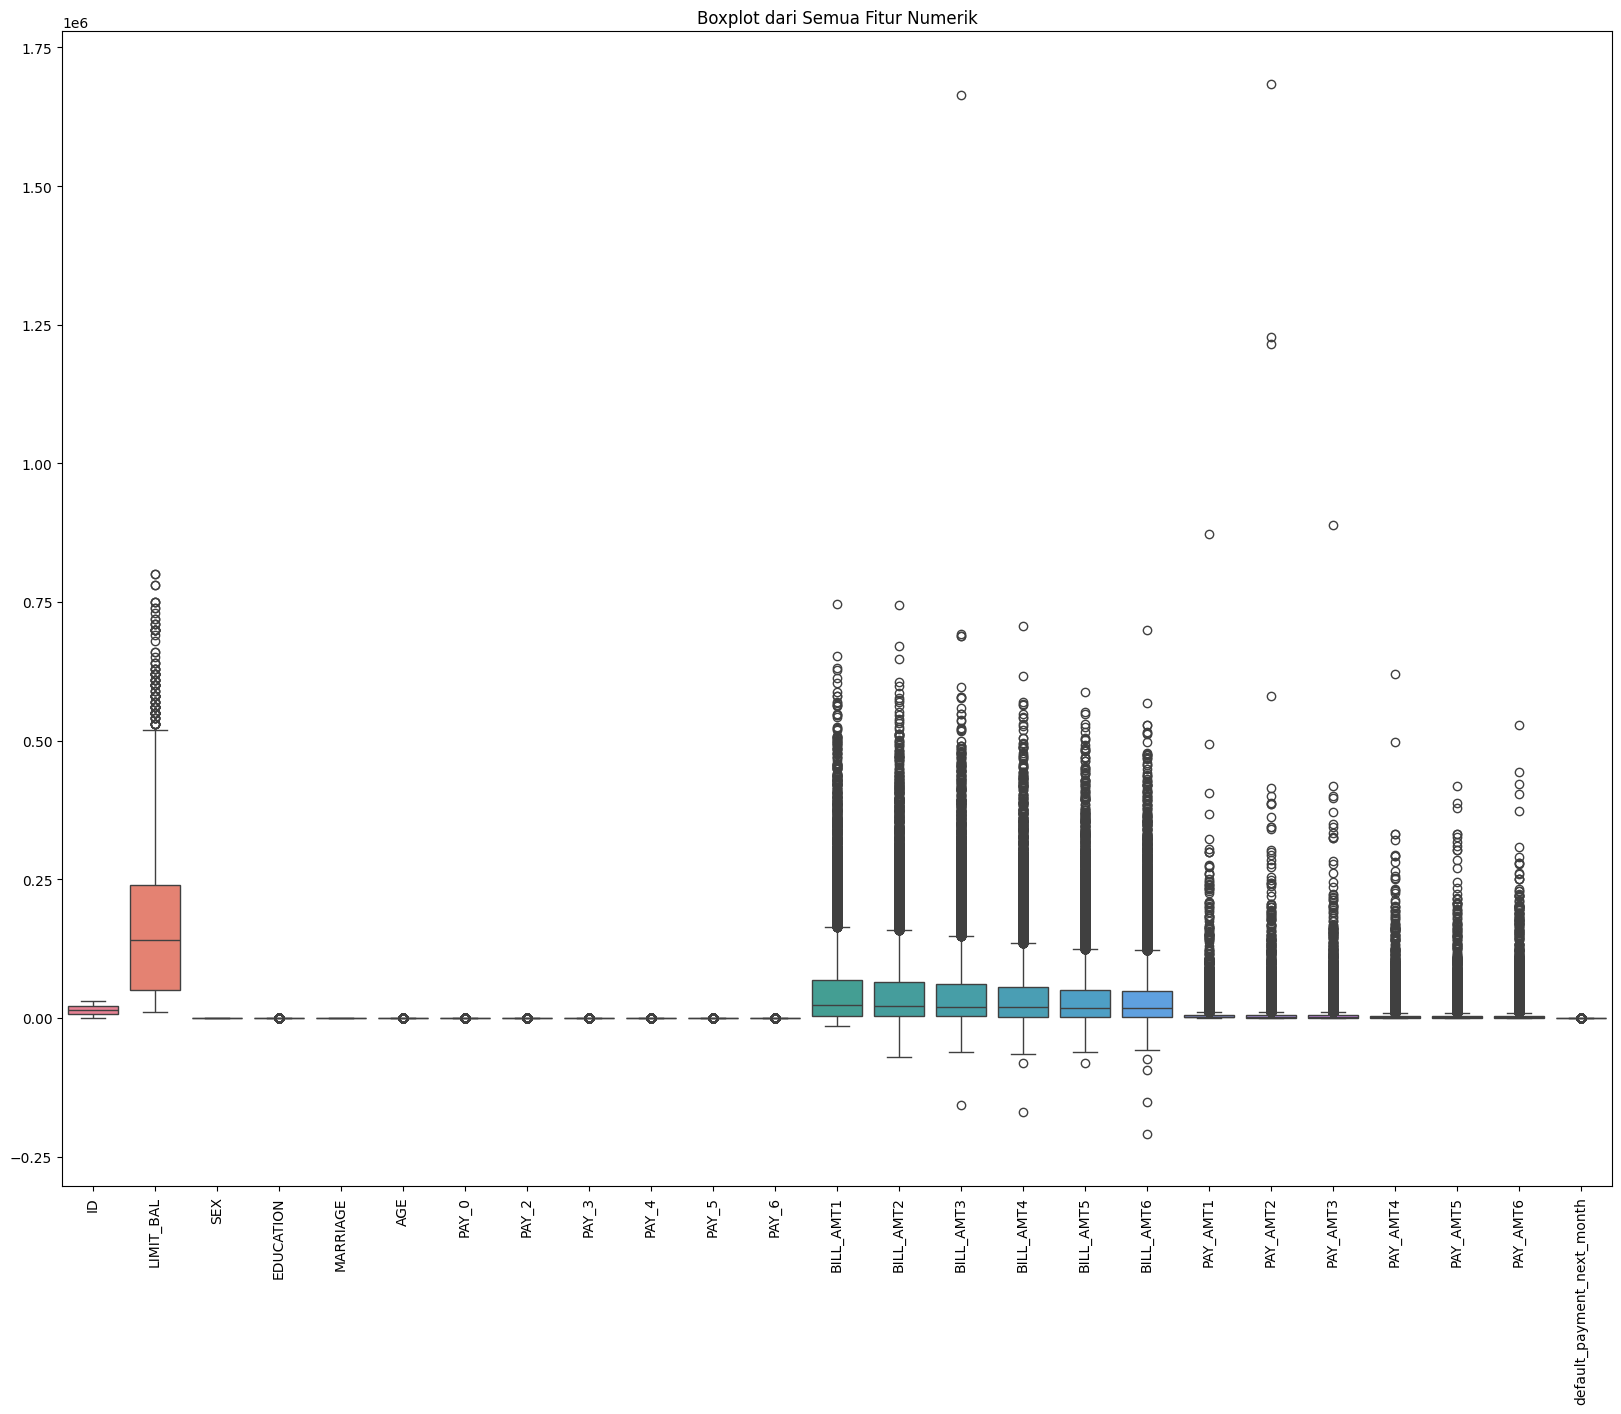

In [ ]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Memutar label sumbu X agar tidak tumpang tindih
plt.title('Boxplot dari Semua Fitur Numerik')
plt.show()

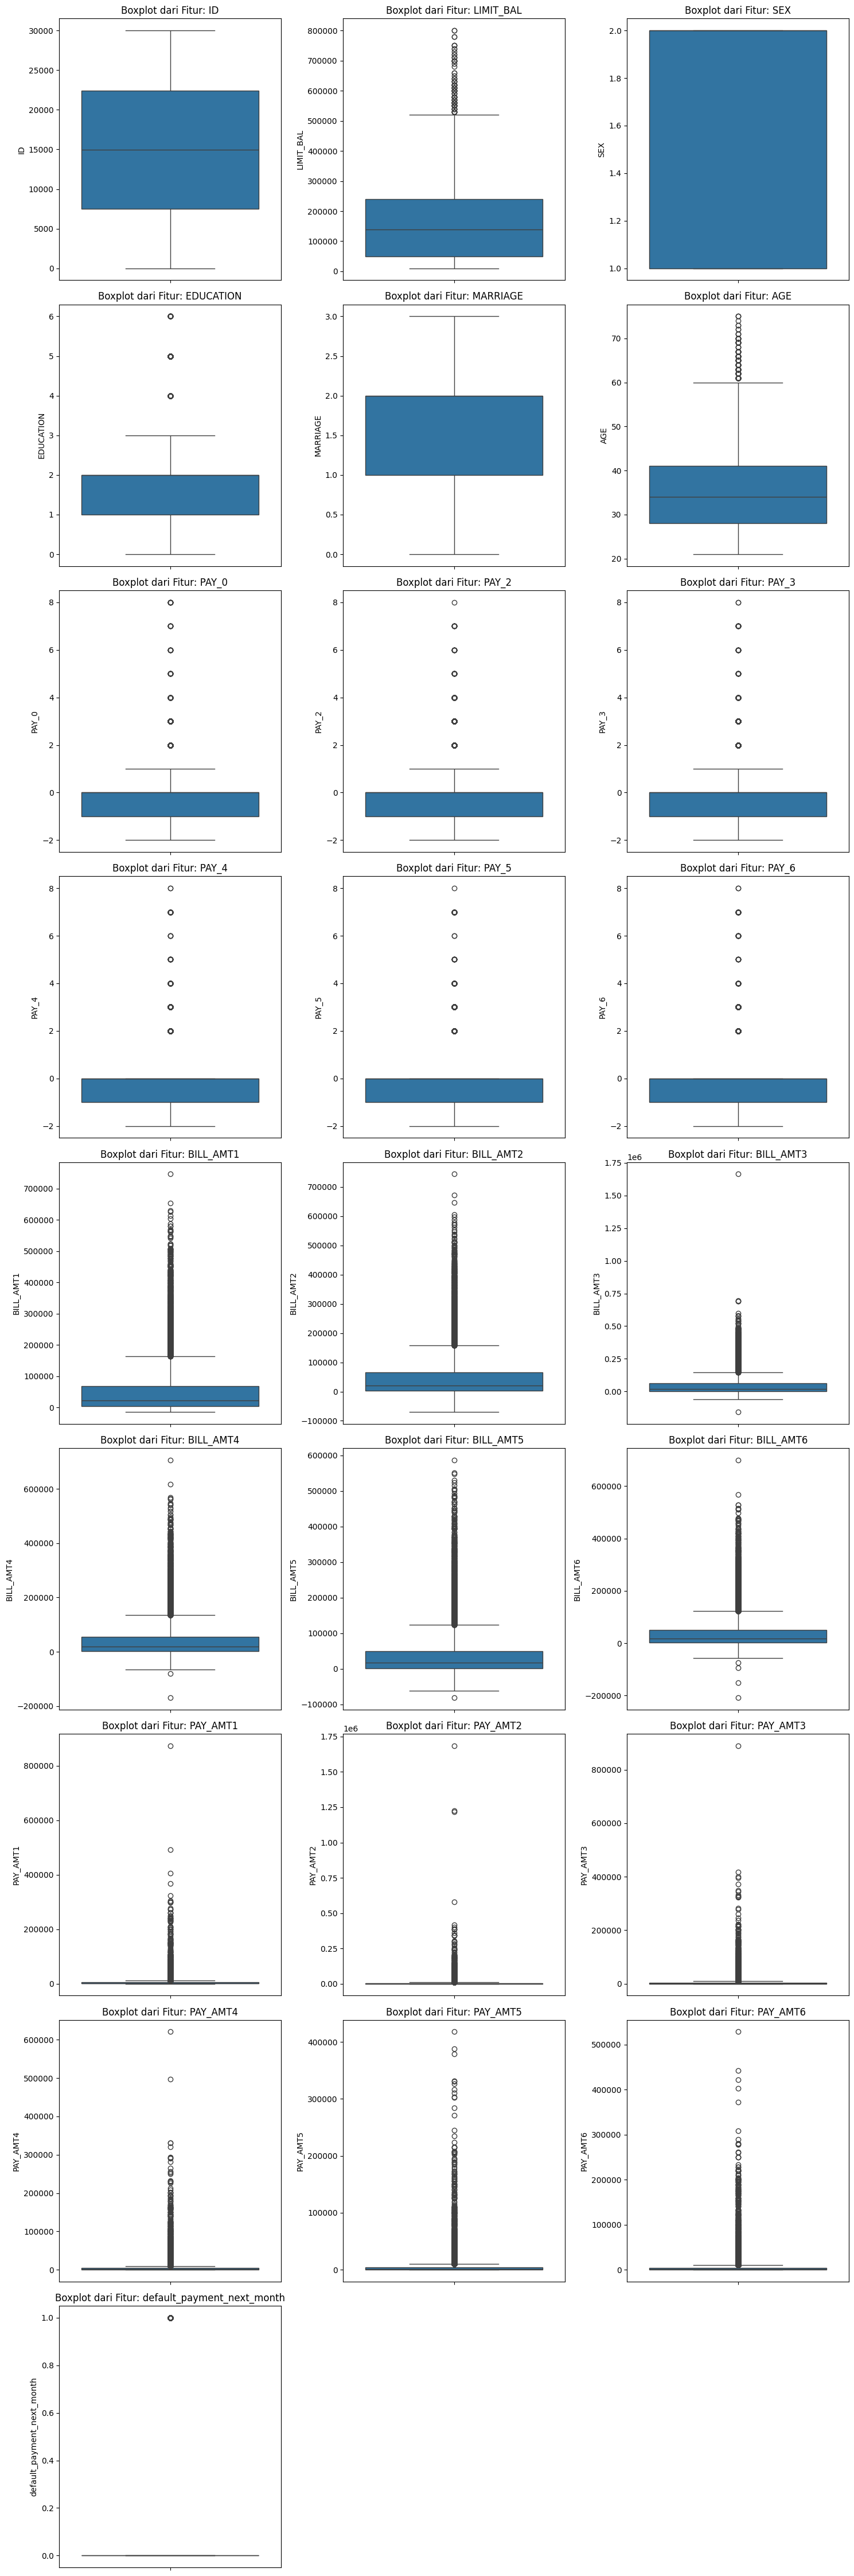

In [ ]:
# Menentukan fitur numerik
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Mengatur ukuran figure dan jumlah subplot per baris
n_features = len(numeric_features)
n_cols = 3  # Jumlah boxplot per baris
n_rows = (n_features + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Plot setiap fitur dalam subplot
for i, feature in enumerate(numeric_features):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(y=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot dari Fitur: {feature}')

# Menghapus subplot yang kosong
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

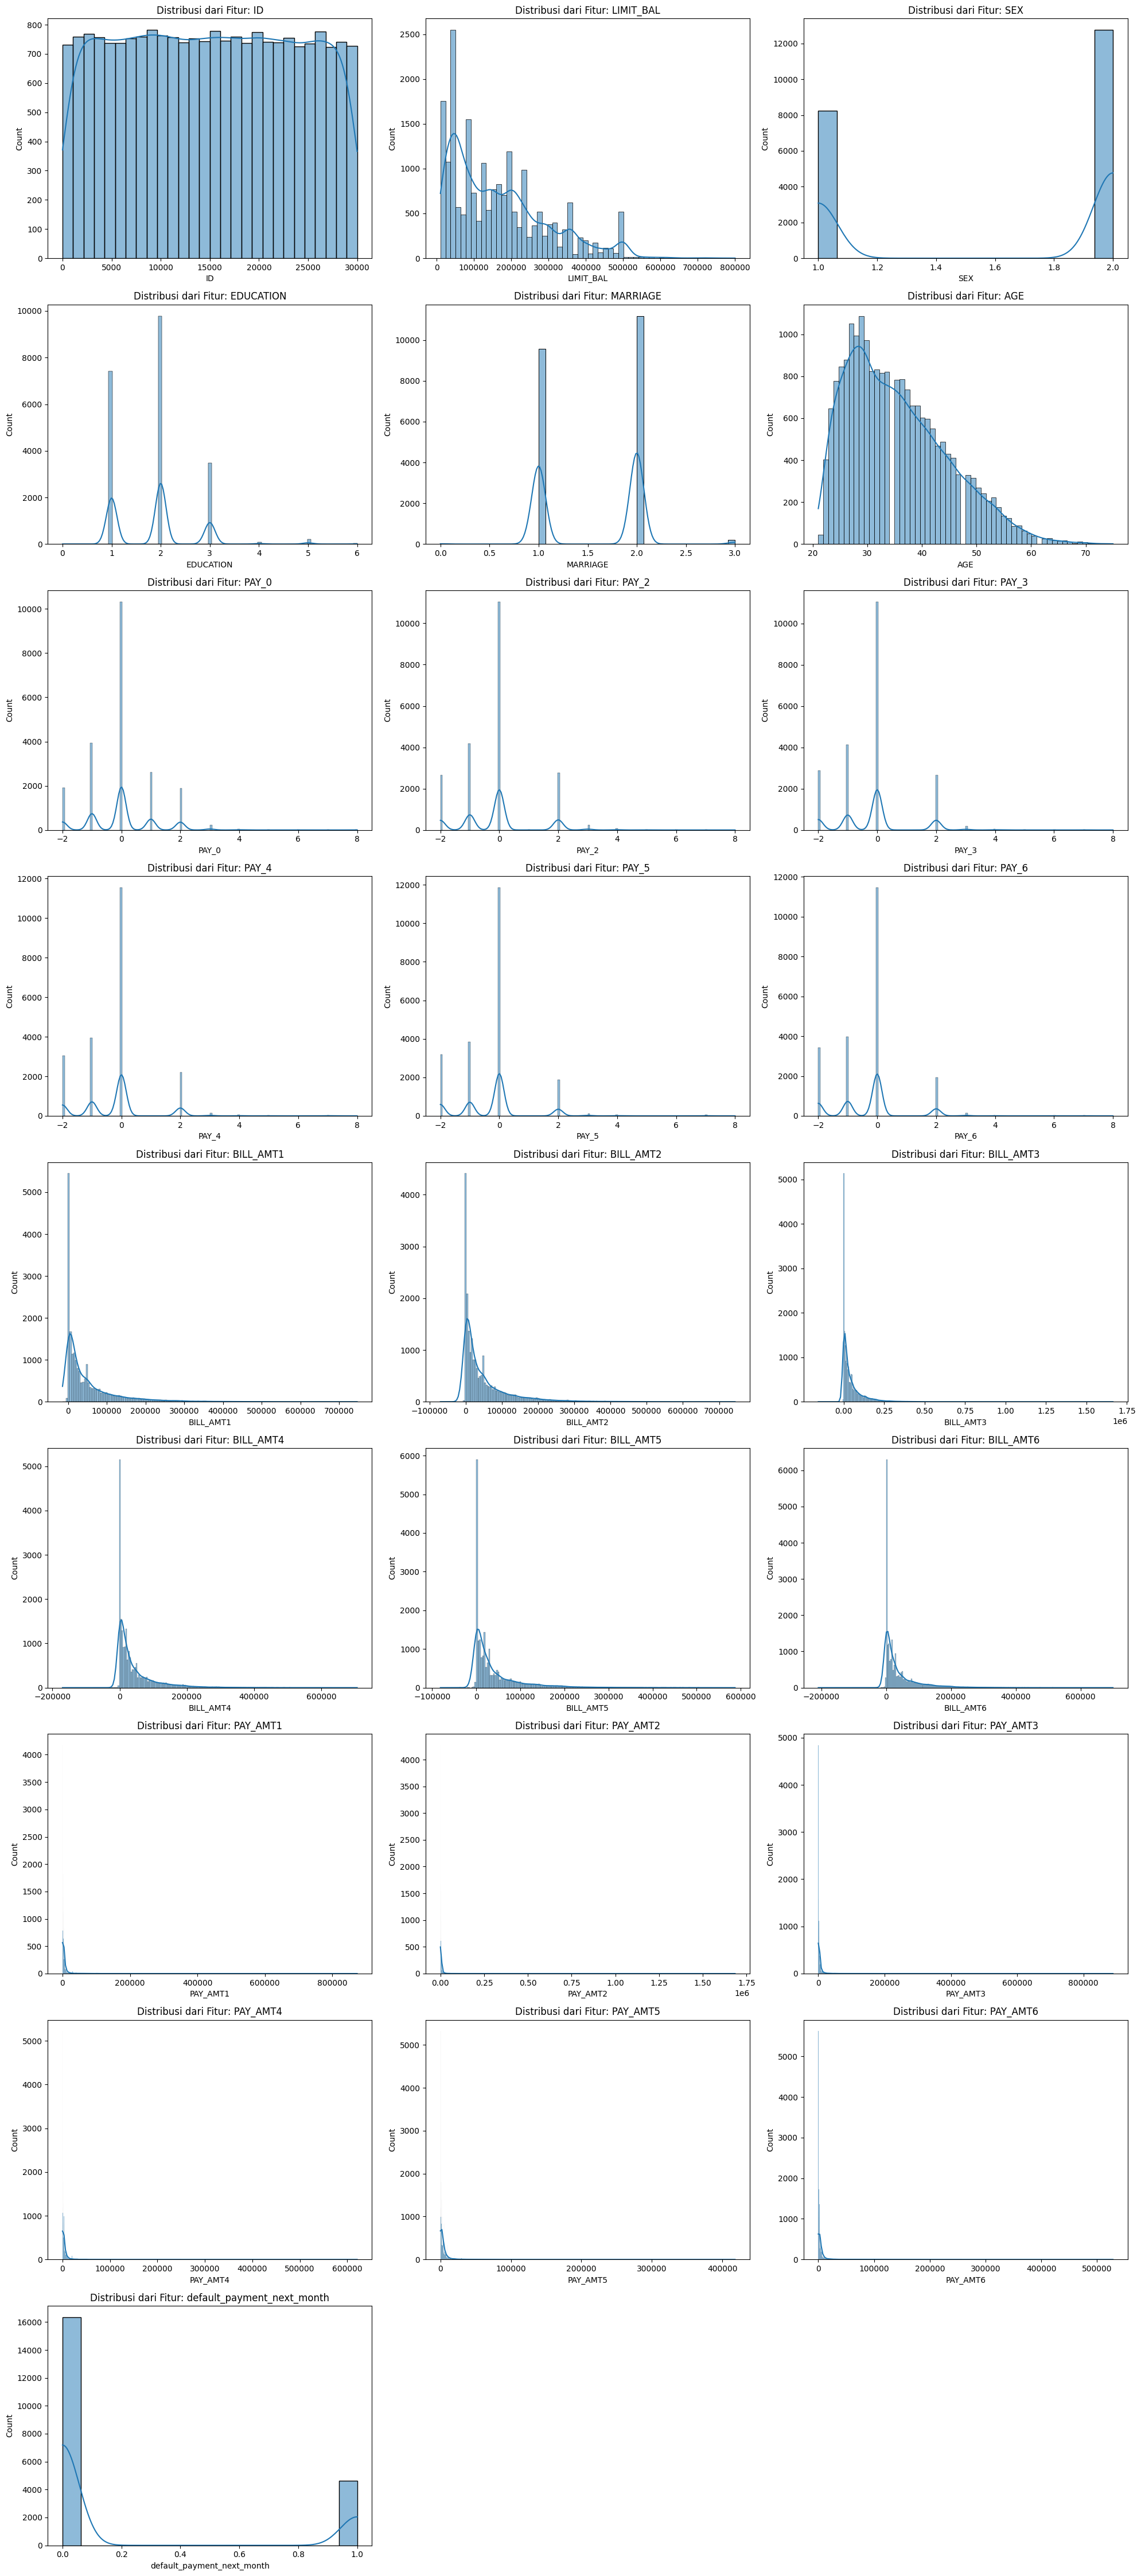

In [ ]:
# Mengatur ukuran figure dan jumlah subplot per baris
n_features = len(numeric_features)
n_cols = 3  # Jumlah histogram per baris
n_rows = (n_features + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Plot setiap fitur dalam subplot
for i, feature in enumerate(numeric_features):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribusi dari Fitur: {feature}')

# Menghapus subplot yang kosong
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

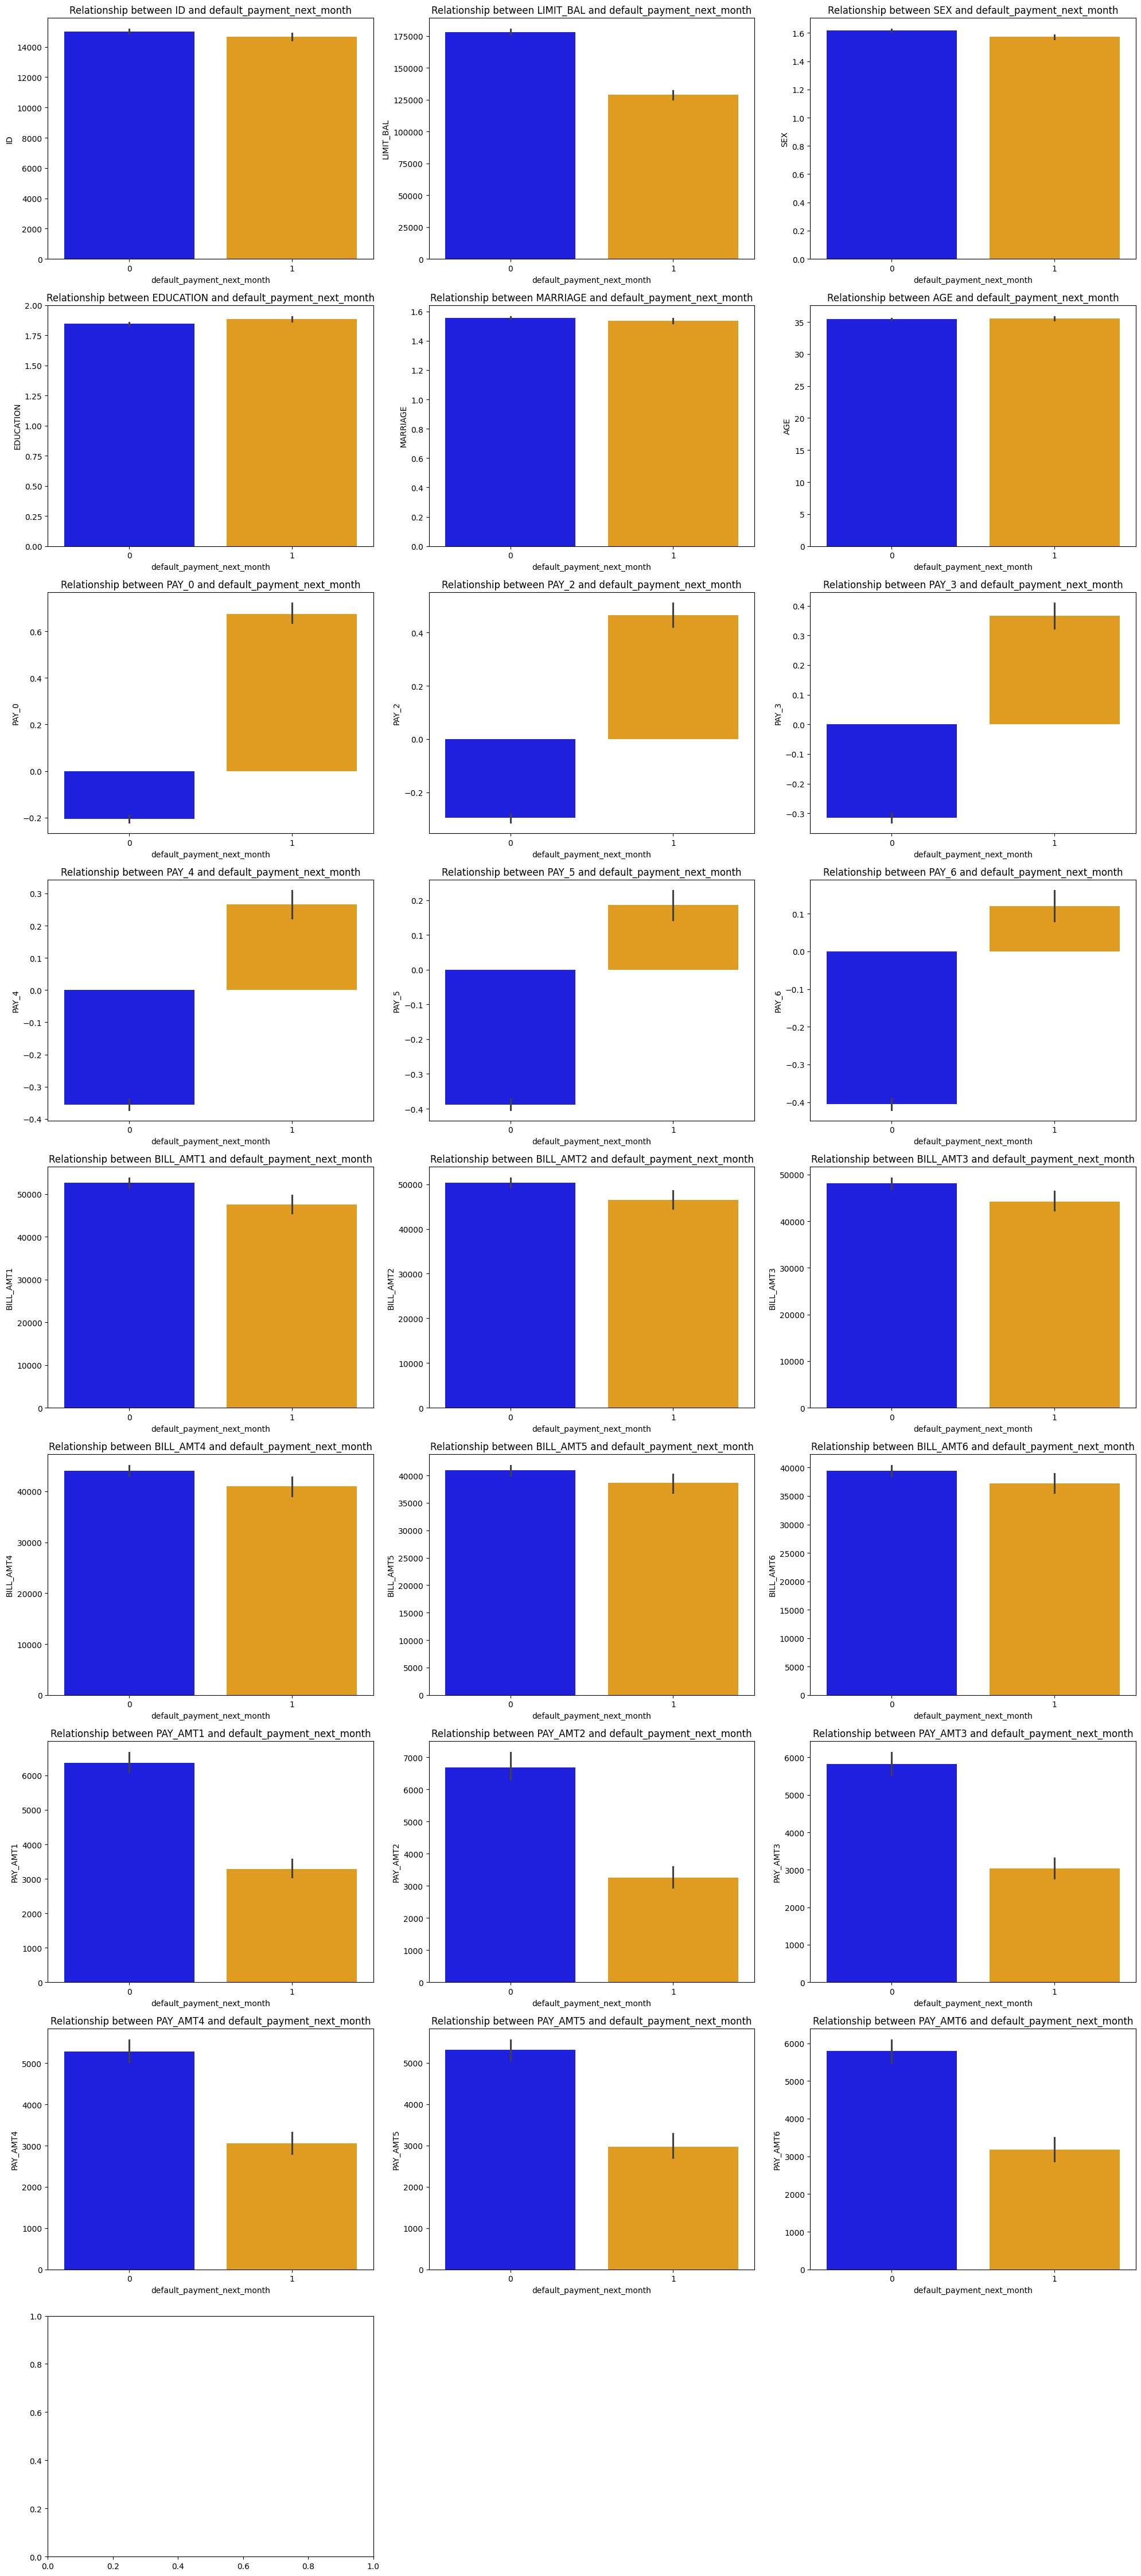

In [ ]:
# Menentukan variabel target
target = 'default_payment_next_month'

# Menentukan fitur numerik
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Mengatur ukuran figure dan jumlah subplot per baris
n_features = len(numeric_features)
n_cols = 3  # Jumlah plot per baris
n_rows = (n_features + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Warna untuk hue
colors = ["blue", "orange"]

# Plot setiap fitur dalam subplot
for i, col in enumerate(numeric_features):
    if col != target:  # Tidak perlu memplot target terhadap dirinya sendiri
        row = i // n_cols
        col_pos = i % n_cols
        sns.barplot(data=df, x=target, y=col, estimator=np.mean, hue=target, palette=colors, ax=axes[row, col_pos], dodge=False)
        axes[row, col_pos].set_title(f'Relationship between {col} and {target}')
        axes[row, col_pos].legend_.remove()  # Menghapus legenda untuk setiap subplot

# Menghapus subplot yang kosong
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### DATA PREPARATION ###

In [ ]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [ ]:
# Fungsi untuk melakukan pengisian data NaN dengan menggunakan nilai unik
def fill_na_with_random_unique_value(column):
    unique_values = column.dropna().unique()  # Ambil nilai unik dari kolom yang tidak NaN
    nan_indices = column[column.isna()].index  # Ambil indeks dari nilai NaN
    fill_values = [random.choice(unique_values) for _ in range(len(nan_indices))]  # Buat nilai acak yang unik sebanyak NaN yang ada
    column_copy = column.copy()  # Buat salinan kolom
    column_copy.loc[nan_indices] = fill_values  # Isi nilai NaN dengan nilai acak yang unik di salinan kolom
    return column_copy

In [ ]:
# Mengisi nilai NaN atau nilai tidak diketahui (unknown) dengan nilai acak yang unik untuk semua kolom numerik
for col in df.select_dtypes(include=['int64']).columns:
    if df[col].dtype == 'object':
        df[col] = fill_na_with_random_unique_value(df[col])

In [ ]:
df_encoded = pd.get_dummies(df.drop(columns=['default_payment_next_month']), drop_first=True)

In [ ]:
# Memperbaiki data outliers
Q1 = df.select_dtypes(include=['int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['int64']).quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df.select_dtypes(include=['int64']) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=['int64']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Tambahkan kembali kolom target
df_encoded['default_payment_next_month'] = df['default_payment_next_month']

In [ ]:
# Pembagian data menjadi data latih dan data uji
X = df_encoded.drop('default_payment_next_month', axis=1)
y = df_encoded['default_payment_next_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


### Modelling ###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [ ]:
# Menentukan fitur dan target
features = df.drop(columns=['ID', 'default_payment_next_month'])
target = df['default_payment_next_month']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**DECISION TREE**

In [ ]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Prediksi dengan Decision Tree
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluasi Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7116666666666667
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      3237
           1       0.38      0.42      0.40       963

    accuracy                           0.71      4200
   macro avg       0.60      0.61      0.61      4200
weighted avg       0.72      0.71      0.72      4200



**RANDOM FOREST**

In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Prediksi dengan Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluasi Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.804047619047619
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      3237
           1       0.62      0.37      0.46       963

    accuracy                           0.80      4200
   macro avg       0.73      0.65      0.67      4200
weighted avg       0.78      0.80      0.78      4200



**LOGISTIC REGRESSION**

In [ ]:
# Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Prediksi dengan Logistic Regression
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluasi Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7707142857142857
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      3237
           1       0.00      0.00      0.00       963

    accuracy                           0.77      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.59      0.77      0.67      4200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EVALUATION ###

In [ ]:
# Daftar model yang akan dievaluasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
}

# Evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Logistic Regression Accuracy: 0.7707142857142857
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3237
           1       0.00      0.00      0.00       963

    accuracy                           0.77      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.59      0.77      0.67      4200




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Accuracy: 0.7107142857142857
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3237
           1       0.38      0.40      0.39       963

    accuracy                           0.71      4200
   macro avg       0.60      0.60      0.60      4200
weighted avg       0.72      0.71      0.71      4200


Random Forest Accuracy: 0.8045238095238095
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3237
           1       0.63      0.37      0.46       963

    accuracy                           0.80      4200
   macro avg       0.73      0.65      0.67      4200
weighted avg       0.78      0.80      0.78      4200


Gradient Boosting Accuracy: 0.8092857142857143
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k-NN Accuracy: 0.7454761904761905
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      3237
           1       0.39      0.19      0.26       963

    accuracy                           0.75      4200
   macro avg       0.59      0.55      0.55      4200
weighted avg       0.70      0.75      0.71      4200




Decision Tree - Training Accuracy: 0.9995833333333334, Test Accuracy: 0.7145238095238096
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3237
           1       0.39      0.42      0.40       963

    accuracy                           0.71      4200
   macro avg       0.60      0.61      0.61      4200
weighted avg       0.72      0.71      0.72      4200




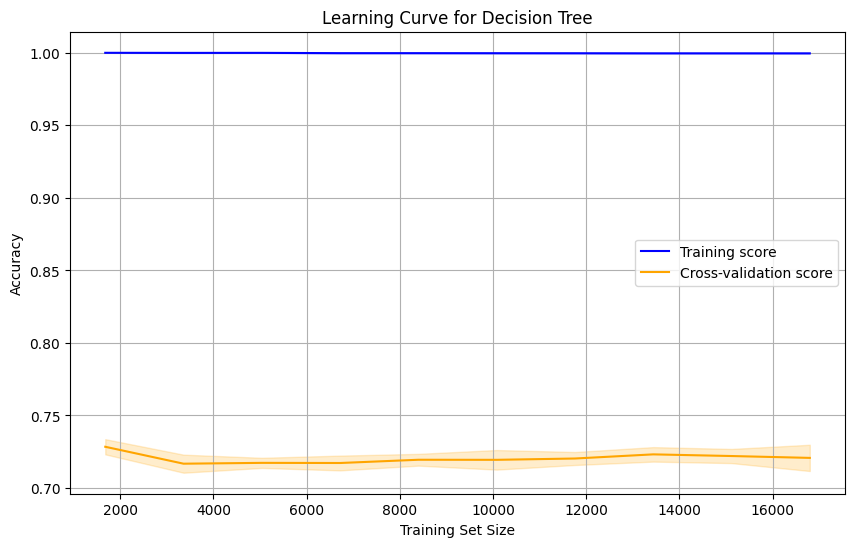

Random Forest - Training Accuracy: 0.9995833333333334, Test Accuracy: 0.8071428571428572
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3237
           1       0.63      0.37      0.47       963

    accuracy                           0.81      4200
   macro avg       0.73      0.66      0.68      4200
weighted avg       0.79      0.81      0.79      4200




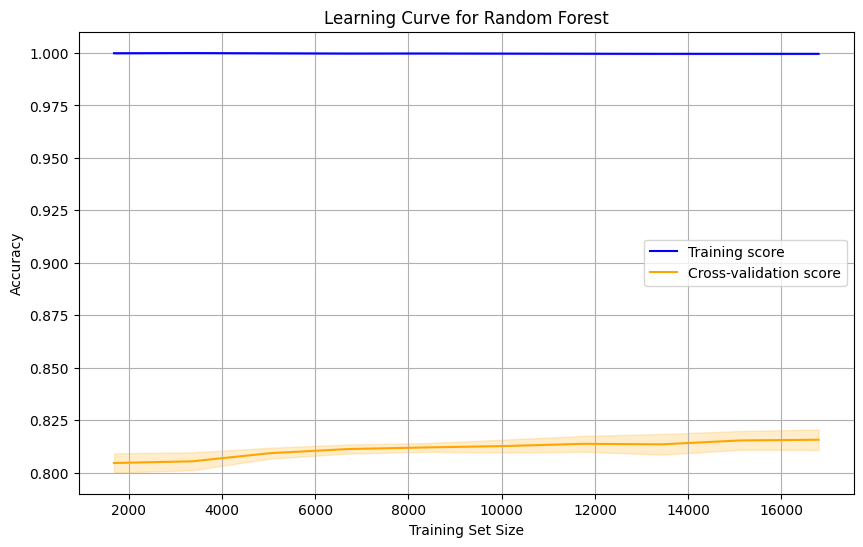

Logistic Regression - Training Accuracy: 0.7807738095238095, Test Accuracy: 0.7707142857142857
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3237
           1       0.00      0.00      0.00       963

    accuracy                           0.77      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.59      0.77      0.67      4200




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


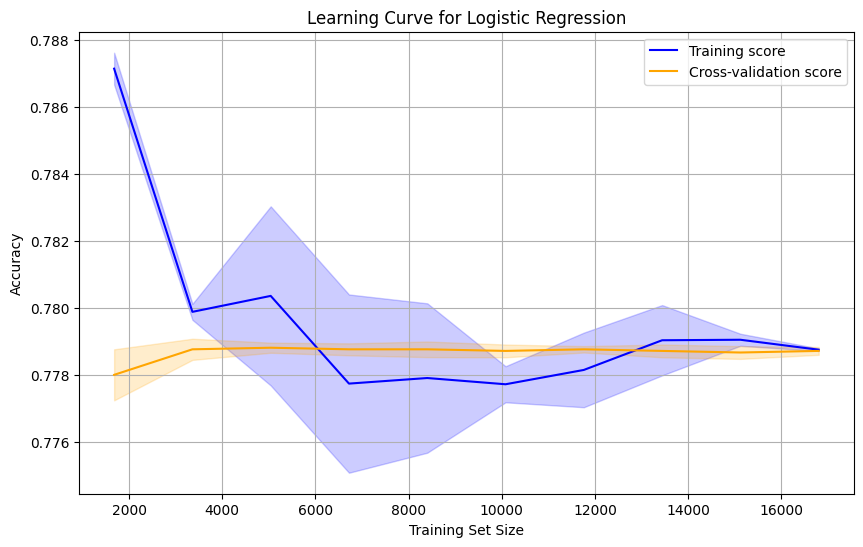

In [ ]:
# Daftar model yang akan dievaluasi
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Fungsi untuk plot kurva pembelajaran
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='orange')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='orange', alpha=0.2)
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Evaluasi model dan plot kurva pembelajaran
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{name} - Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred_test)}\n")
    plot_learning_curve(model, features, target, name)


In [ ]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Daftar model yang akan dievaluasi
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Fungsi untuk plot kurva pembelajaran
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='orange')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='orange', alpha=0.2)
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Hyperparameter tuning dengan GridSearchCV
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    },
    'k-NN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

best_models = {}

In [ ]:
from sklearn.model_selection import GridSearchCV

for model_name, model in models.items():.
    # Definisikan GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               scoring='accuracy', cv=5, n_jobs=-1)

    # Lakukan fitting terhadap data latih
    grid_search.fit(X_train, y_train)

    # Simpan model terbaik
    best_models[model_name] = grid_search.best_estimator_

    # Print hasil tuning
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")
    print()

# Cetak model terbaik untuk setiap jenis model
for model_name, best_model in best_models.items():
    print(f"Best {model_name} model: {best_model}")
    print()

In [ ]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data pelatihan yang sudah disediakan
data = {
    'LIMIT_BAL': [20000, 30000, 50000, 70000, 100000],
    'SEX': [2, 1, 2, 2, 1],
    'EDUCATION': [2, 1, 2, 3, 2],
    'MARRIAGE': [1, 2, 1, 2, 1],
    'AGE': [24, 34, 45, 23, 56],
    'PAY_0': [2, -1, 0, 0, -1],
    'PAY_2': [2, -1, 0, 0, -1],
    'PAY_3': [2, -1, 0, 0, -1],
    'PAY_4': [2, -1, 0, 0, -1],
    'BILL_AMT4': [5000, 6000, 7000, 8000, 9000],
    'BILL_AMT5': [5000, 6000, 7000, 8000, 9000],
    'BILL_AMT6': [5000, 6000, 7000, 8000, 9000],
    'PAY_AMT1': [1000, 1500, 2000, 2500, 3000],
    'PAY_AMT2': [1000, 1500, 2000, 2500, 3000],
    'PAY_AMT3': [1000, 1500, 2000, 2500, 3000],
    'PAY_AMT4': [1000, 1500, 2000, 2500, 3000],
    'PAY_AMT5': [1000, 1500, 2000, 2500, 3000],
    'PAY_AMT6': [1000, 1500, 2000, 2500, 3000],
}

# Target (default payment next month)
target = [0, 1, 0, 0, 1]

# Konversi data ke DataFrame
df = pd.DataFrame(data)
df['default_payment_next_month'] = target

# Pisahkan fitur dan target
features = df.drop(columns=['default_payment_next_month'])
target = df['default_payment_next_month']

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Melatih model-model
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
logistic_regression_model = LogisticRegression(max_iter=200)

decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)

# Simpan model ke file menggunakan pickle
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
import pandas as pd
import pickle

# Muat model yang sudah disimpan menggunakan pickle
with open('decision_tree_model.pkl', 'rb') as file:
    decision_tree_model = pickle.load(file)

with open('random_forest_model.pkl', 'rb') as file:
    random_forest_model = pickle.load(file)

with open('logistic_regression_model.pkl', 'rb') as file:
    logistic_regression_model = pickle.load(file)

# Contoh data untuk prediksi (input features)
data = {
    'LIMIT_BAL': [20000],
    'SEX': [2],
    'EDUCATION': [2],
    'MARRIAGE': [1],
    'AGE': [24],
    'PAY_0': [2],
    'PAY_2': [2],
    'PAY_3': [2],
    'PAY_4': [2],
    'BILL_AMT4': [0],
    'BILL_AMT5': [0],
    'BILL_AMT6': [0],
    'PAY_AMT1': [0],
    'PAY_AMT2': [0],
    'PAY_AMT3': [0],
    'PAY_AMT4': [0],
    'PAY_AMT5': [0],
    'PAY_AMT6': [0],
}

# Konversi data ke DataFrame
input_data = pd.DataFrame(data)

# Prediksi
decision_tree_pred = decision_tree_model.predict(input_data)
random_forest_pred = random_forest_model.predict(input_data)
logistic_regression_pred = logistic_regression_model.predict(input_data)

# Cetak prediksi
print("Decision Tree Prediction: ", decision_tree_pred[0])
print("Random Forest Prediction: ", random_forest_pred[0])
print("Logistic Regression Prediction: ", logistic_regression_pred[0])

Decision Tree Prediction:  0
Random Forest Prediction:  0
Logistic Regression Prediction:  1


### CONCLUSION ###

1. Pendahuluan
Pada proyek ini, kami mengembangkan model machine learning untuk memprediksi kemungkinan default pembayaran kartu kredit berdasarkan fitur-fitur tertentu dari pelanggan. Data yang digunakan mencakup informasi demografis, status pembayaran sebelumnya, dan jumlah tagihan serta pembayaran sebelumnya.

2. Metode
saya menggunakan tiga algoritma berbeda untuk melakukan prediksi:

* Decision Tree
* Random Forest
* Logistic Regression

Setiap model dilatih dengan menggunakan data historis pelanggan, dan kemudian diuji dengan contoh data baru untuk menentukan prediksi kemungkinan default.

3. Hasil dan Analisis
Contoh data yang digunakan untuk prediksi memiliki karakteristik sebagai berikut:

* LIMIT_BAL: 20,000
* SEX: 2 (wanita)
* EDUCATION: 2 (sarjana)
* MARRIAGE: 1 (menikah)
* AGE: 24
* PAY_0 to PAY_4: 2 (penundaan pembayaran selama 2 bulan berturut-turut)
* BILL_AMT4 to BILL_AMT6: 0 (tidak ada tagihan selama tiga bulan terakhir)
* PAY_AMT1 to PAY_AMT6: 0 (tidak ada pembayaran selama enam bulan terakhir)
* Hasil prediksi dari ketiga model adalah:

Decision Tree Prediction: 0 (tidak default)
Random Forest Prediction: 0 (tidak default)
Logistic Regression Prediction: 1 (default)

4. Kesimpulan
Dari hasil prediksi ketiga model, dapat disimpulkan bahwa ada perbedaan hasil antara model Logistic Regression dengan model Decision Tree dan Random Forest. Decision Tree dan Random Forest memprediksi bahwa pelanggan tidak akan melakukan default, sedangkan Logistic Regression memprediksi sebaliknya.